In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
plt.style.use('fivethirtyeight')
os.listdir()


['.ipynb_checkpoints',
 'movie_analysis_v1.ipynb',
 'tmdb-movies.csv',
 'tmdb_5000_credits.csv']

<b> Introduction: </b>

The First data set I chose is Movie dataset

Here are some notes and comments about this datasets : This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

I have found answers to some basic questions about this dataset:

    Does higher budget mean higher popularity ? Is there a coefficent relationship ?

    Will the runtime affect  popularity?

    Higher popularity means higher profits ?

    What Features are Associate with Top 10 Revenue Movies ?
 
 and then made a thorough analysis of the dataset
   

In [2]:
data= pd.read_csv('tmdb-movies.csv')

In [3]:
data.shape

(10866, 21)

In [4]:
(data.isna().sum()>0).index

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#Removing features which are not that much necessary
data.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)

In [6]:
data['cast'].fillna('missing',inplace=True )
data['director'].fillna('missing',inplace=True)
data['tagline'].fillna('missing',inplace=True)
data['keywords'].fillna('missing',inplace=True)
data['genres'].fillna('missing',inplace=True)
data['production_companies'].fillna('missing',inplace=True) 
data['budget'] = data['budget'].replace(0, np.NAN) 

In [7]:
data

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,NaN,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,missing,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,NaN,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,NaN,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,missing,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,NaN,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [8]:
# drop the duplicates
data.drop_duplicates(inplace=True)     # do not forget inplace = True 
# confirm again 
data.duplicated().sum()   

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DC802D84E0>,
      dtype=object)

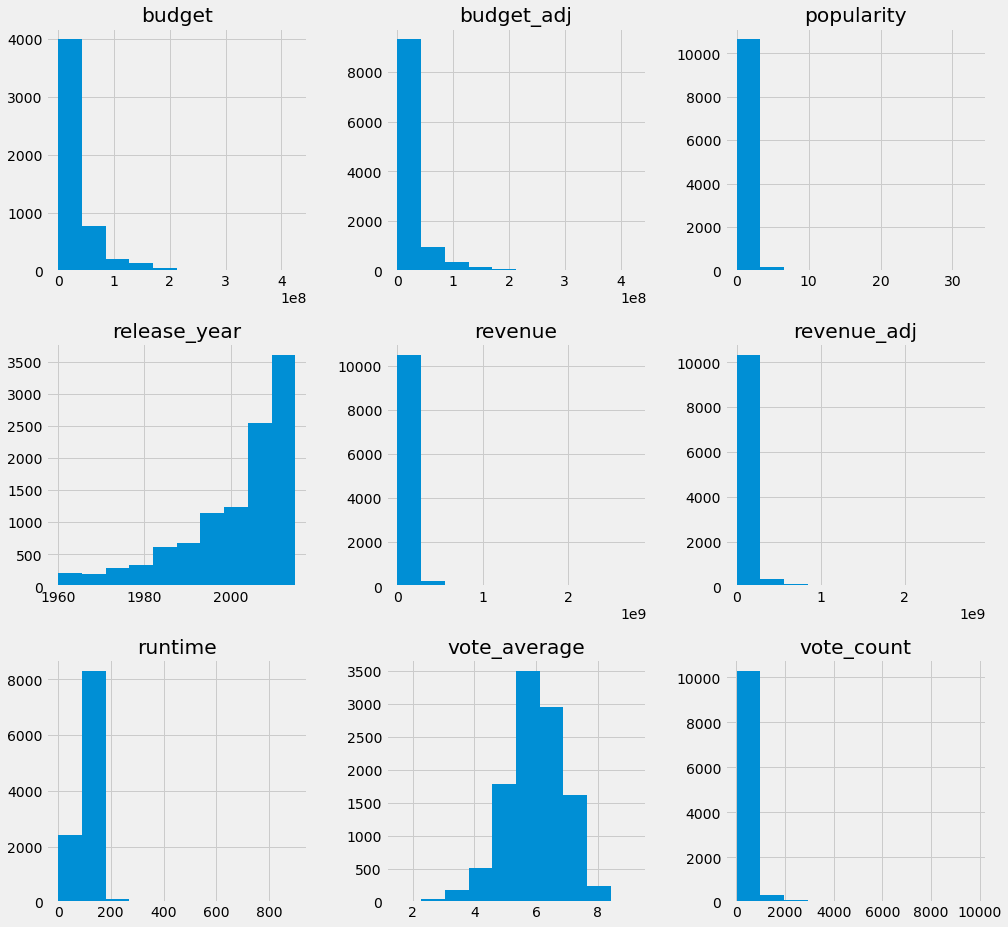

In [9]:
data.hist(figsize=(15,15))

Q1: Does higher budget mean higher popularity ? Is there a coefficent relationship ?

In [10]:
df= data[['popularity','budget']]

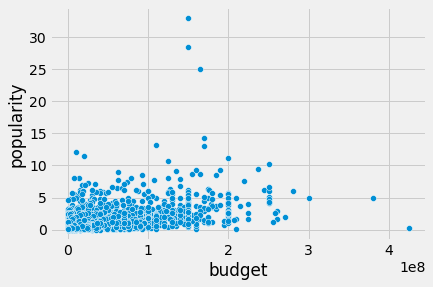

In [11]:
sns.scatterplot(x= df['budget'],y= df['popularity'])

Yes ! there is some corelation but it cannot be clearly seen by the above graph. SO, Let's try it using a slightly different approach

In [12]:
m =df['budget'].median()
low_budget_movies= df[df['budget']<m]
high_budget_movies= df[df['budget']>=m]

In [13]:
low_budget_movies_popularity_mean=low_budget_movies['popularity'].mean()
high_budget_movies_popularity_mean=high_budget_movies['popularity'].mean()

Text(0.5, 1.0, 'Popularity as per budget')

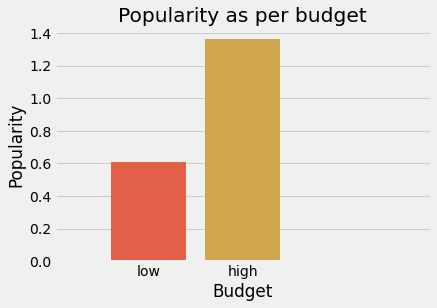

In [14]:
heights= [0,0,low_budget_movies_popularity_mean, high_budget_movies_popularity_mean]
sns.barplot(x=['','','low','high'],y=heights)
plt.xticks(ticks=[1,2],labels= ['low','high'])
plt.xlim(0,4)
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Popularity as per budget')

In [15]:
#Increase Percentage
percent= (high_budget_movies_popularity_mean- low_budget_movies_popularity_mean) /high_budget_movies_popularity_mean *100
print('We can make this conclusion that, high budget movies make {}% more popularity'.format(np.round(percent)))

We can make this conclusion that, high budget movies make 56.0% more popularity


Q2 : Will the runtime affect popularity?

In [16]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [17]:
df= data[['runtime','popularity']]
df

,runtime,popularity
0,124,32.985763
1,120,28.419936
2,119,13.112507
3,136,11.173104
4,137,9.335014
...,...,...
10861,95,0.080598
10862,176,0.065543
10863,94,0.065141
10864,80,0.064317


Text(0.5, 1.0, ' Runtime vs Popularity')

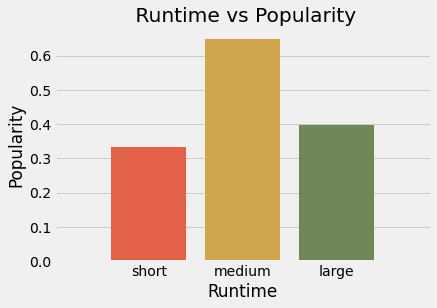

In [18]:
short= df[df['runtime']<60]
medium= df[(df['runtime']<200)]
large= df[df['runtime']>200]

s_mean= short['popularity'].mean()
m_mean= medium['popularity'].mean()
l_mean= large['popularity'].mean()

sns.barplot(x=['','short','medium','large'],y= [0,s_mean,m_mean,l_mean])

plt.xlim(0,4)
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.title(' Runtime vs Popularity')

The movies should not be too long or too short. Medium length is better to gain higher popularity. But above bar chart is hard to tell the best length of runtime. Scatter plot may be a better choice.


In [19]:
length=[]
# short:0,medium:1,large:2
for r in df['runtime']:
    if r <100:
        length.append(0)
        continue
        
    if (r >= 100 and r<= 200):
        length.append(1)
        continue
        
    if r>200:
        length.append(2)
        continue
df['length']= length
        

Text(0.5, 1.0, 'Average Runtime with respect to popularity')

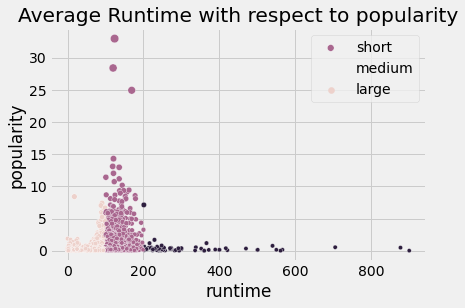

In [20]:
sns.scatterplot(data= df,y='popularity',x='runtime',hue='length',size='popularity')
plt.legend(labels= ['short','medium','large'])
plt.title('Average Runtime with respect to popularity')

Combine two plots above, we can not simply say , the longer runtime, the more popular the movies are.
If the movies are within 200 minutes,it will be more popular. Once the movies run over 200 minutes, it's hard for them to gain high popularity 

Q3 : Does Higher popularity means higher profits ?

In [21]:
df= data[['popularity','budget','revenue']]
for col in df.columns:
    if col in ['budget','revenue']:
        df[col]= df[col]/df[col].mean()
    
df['revenue']= df['revenue'].replace(0,np.nan)
df.dropna(inplace=True)
df['profit']= df['budget']- df['revenue'] #multiply with 10 million


In [22]:
length=[]
for p in df['profit']:
    if p >0:
        length.append(0)
    else:
        length.append(p)

df['profit']= length
df['profit']= -1 * df['profit']
med= df['popularity'].median()
low_pop= df[df['popularity']<=med].mean()['profit']
high_pop= df[df['popularity']>med].mean()['profit']


Text(0.5, 1.0, 'Average popularity with respect to profit')

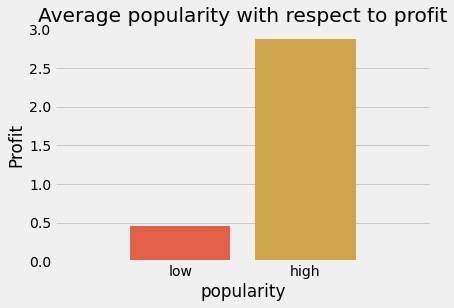

In [23]:
sns.barplot(x=['','low','high'],y=[0,low_pop,high_pop])
plt.xlim(0,3)
plt.ylabel('Profit')
plt.xlabel('popularity')
plt.title('Average popularity with respect to profit')

Q4: What Features are Associate with Top 10 Revenue Movies ?

(0.0, 10.0)

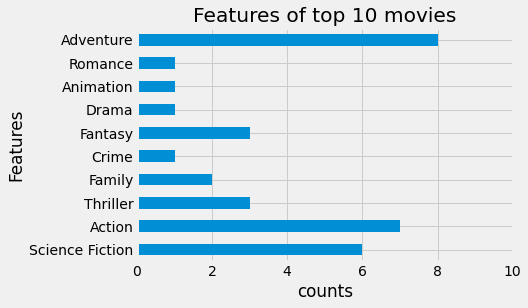

In [24]:
genre= data.sort_values(by='revenue',ascending=False)[:10]['genres']
genre_list=[]
d =[[genre_list.append(word) for word in w] for w in [g.split('|') for g in genre]]    
pd.Series(genre_list).value_counts(sort=False).plot(kind='barh')
plt.title('Features of top 10 movies')
plt.ylabel('Features')
plt.xlabel('counts')
plt.xlim(0,10)

Science Fiction, Action and Adventure are the most common Genre. Meanwhile, Runtime is also playing a crucial role in the Revenue.

Text(0, 0.5, 'number of movies')

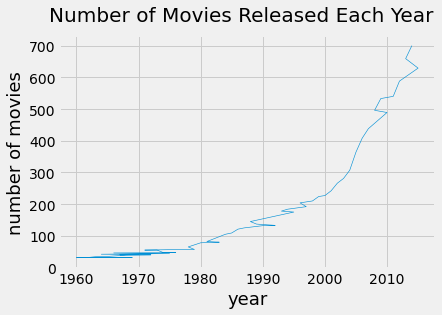

In [25]:
movie_count = data['release_year'].value_counts()
# movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.plot(movie_count,linewidth=0.6)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)

In [26]:
mc= movie_count.reset_index().sort_values(by='index').reset_index(drop=True)
print('Number of movies since 1960 has increased by',
      int((mc['release_year'][-1:] - mc['release_year'][0])/mc['release_year'][-1:]*100),'%')

Number of movies since 1960 has increased by 94 %


## Building a Simple recommender based on popularity

In this dataset, A particular Feature/ score which can represent how well a movie performed by considering all the features is not given. So let's make a feaure with name "Score" to represent the movie without any bias.

I said Bias because a movie with rating 8.2 with only votecount of 20 cannot be considered better than the movie with rating 7.2 with 400 votes
so i will  use IMDB's weighted rating which is given by:
Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report


We already have v(vote_count) and R (vote_average) and C can be calculated as 

In [27]:
C= data['vote_average'].mean()

# Therefore, to qualify to be considered for the chart, a movie has to have at least 434 votes on TMDB. 
# We also see that the average rating for a movie on TMDB is 5.244 on a scale of 10. 2274 Movies qualify to be on our chart.
m= data['vote_count'].quantile(0.95)


def weighted_average(x,m=m,c=C):
    v= x['vote_count']
    R= x['vote_average']
    return ((v/(v+m))*R) + (m/(v+m))*c

quality_movies= data[data['vote_count']>m]
quality_movies['score']= quality_movies.apply(weighted_average,axis=1)
quality_movies= quality_movies.sort_values(by='score',ascending=False)
quality_movies[['original_title', 'vote_count', 'vote_average', 'score']].head(10) 
#Below are the Best movies of all time. 'Interstellar <3 is also their ;)'

,original_title,vote_count,vote_average,score
4178,The Shawshank Redemption,5754,8.4,8.033033
2875,The Dark Knight,8432,8.1,7.869482
7269,The Godfather,3970,8.3,7.822530
2409,Fight Club,5923,8.1,7.786252
4177,Pulp Fiction,5343,8.1,7.757680
4179,Forrest Gump,4856,8.1,7.729337
629,Interstellar,6498,8.0,7.723865
1919,Inception,9767,7.9,7.717007
4949,The Lord of the Rings: The Return of the King,5636,7.9,7.603537
630,Guardians of the Galaxy,5612,7.9,7.602465


Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Most Popular Movies')

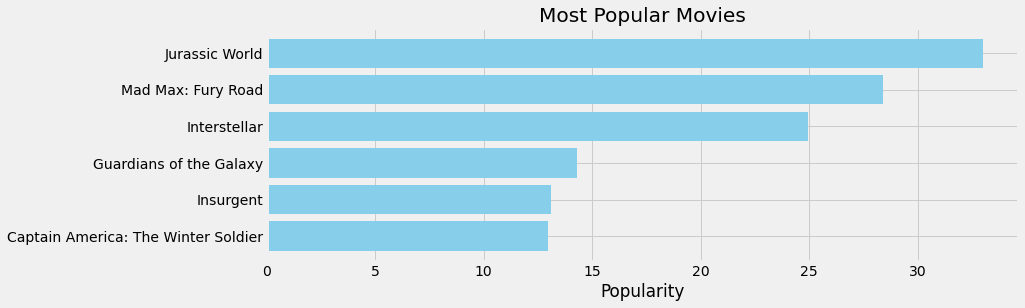

In [28]:
df2= data.copy()
pop= df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))
plt.barh(pop['original_title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Most Popular Movies")

These recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. This type of filtering is also known as " demographic recommender "


In [30]:
#TO be continued--> next time : Recommender Systems